In [0]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import torch.utils.data as data
from torch.utils.data.dataset import Dataset
from torchvision.models.resnet import ResNet, BasicBlock
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.color import rgb2gray
%matplotlib inline

from sklearn import metrics
import matplotlib.image as mpimg
import random
from scipy import interp
from itertools import cycle
import datetime 

import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [0]:
# https://www.kaggle.com/justuser/sign-language-classifier-convnet-with-pytorch
 class Network(nn.Module):   
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(10, 20, 3) #15 or 20
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(20, 30, 3) #20 or 30
        self.dropout1 = nn.Dropout2d()
        
        self.fc3 = nn.Linear(30 * 9 * 9, 270) 
        self.fc4 = nn.Linear(270, 9) 
        
        self.softmax = nn.LogSoftmax(dim=1)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.dropout1(x)
                
        x = x.view(-1, 30 * 9 * 9) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        return self.softmax(x)
    
    
    def test(self, predictions, labels):
        
        self.eval()
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        
        acc = correct / len(predictions)
        print("Correct predictions: %5d / %5d (%5f)" % (correct, len(predictions), acc))
        
    
    def evaluate(self, predictions, labels):
                
        correct = 0
        for p, l in zip(predictions, labels):
            if p == l:
                correct += 1
        
        acc = correct / len(predictions)
        return(acc)

In [0]:
def test(X):
    X_norm = []
    for i in range(X.shape[0]):
        img = X[i]
        img_r = cv2.resize(img, dsize=(50,50), interpolation=cv2.INTER_CUBIC)
        img_g = rgb2gray(img_r)
        img_1d = img_g.flatten()
        X_norm.append(img_1d)
    X_norm = np.asarray(X_norm)

    X_2d = []
    for i in X_norm:
          X_2d.append(i.reshape(1, 50, 50))
    X_2d = np.array(X_2d)
    
    data = torch.FloatTensor(X_2d)

    model = Network()
    model.load_state_dict(torch.load('drive/My Drive/model_wFullDataAug.pth'))
    model.eval()

    predictions = model(data)
    y_pred = torch.max(predictions.data, 1)[1]
    return y_pred.numpy()+1

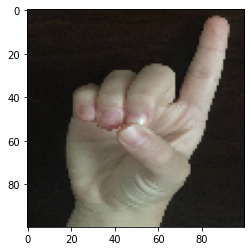

In [8]:
# Individual Testing
test1_img = np.load("drive/My Drive/ML Data/Test/Individual Testing/data.npy")
test1_labels = np.load("drive/My Drive/ML Data/Test/Individual Testing/labels.npy")
plt.imshow(test1_img[0])

In [19]:
y = test(test1_img)
print(y)
print(test1_labels)

[3 1 5 9 4]
['D' 'C' 'A' 'B' 'A']
